In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the directory where all the Parquet files are stored
data = pd.read_csv('/Users/mayahbosworth/Desktop/CMSI-533-01/web-page-phishing.csv')



In [28]:
# Display the first few rows and summary statistics
print(data.head())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0          37       3         0            0        0               0   
1          77       1         0            0        0               0   
2         126       4         1            2        0               1   
3          18       2         0            0        0               0   
4          55       2         2            0        0               0   

   n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  n_plus  \
0        0     0      0              0        0        0        0       0   
1        0     0      0              0        0        0        0       0   
2        3     0      2              0        0        0        0       0   
3        0     0      0              0        0        0        0       0   
4        0     0      0              0        0        0        0       0   

   n_asterisk  n_hastag  n_dollar  n_percent  n_redirection  phishing  
0           0         0   

In [36]:
url_length_descriptive_stats = data['url_length'].describe()
# Calculate median and mode
url_length_median = data['url_length'].median()
url_length_mode = data['url_length'].mode()[0]  # mode() returns a Series, take the first element if multiple modes
print(url_length_descriptive_stats)

count    100077.000000
mean         39.177683
std          47.971847
min           4.000000
25%          18.000000
50%          24.000000
75%          44.000000
max        4165.000000
Name: url_length, dtype: float64


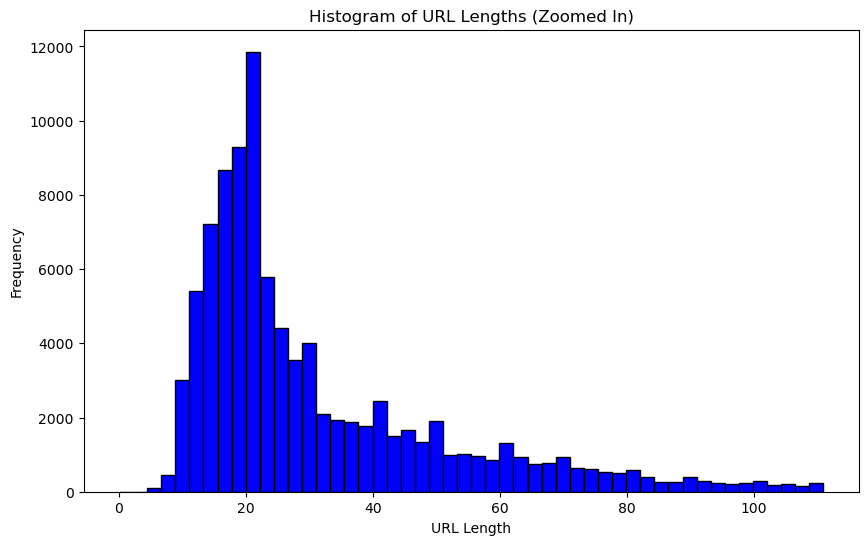

In [41]:
# Define the range of the x-axis based on the quantiles to exclude outliers
x_max = data['url_length'].quantile(0.95)  # Adjust the quantile as needed

# Create a histogram with a narrower x-axis and more bins
plt.figure(figsize=(10, 6))
plt.hist(data['url_length'], bins=50, range=(0, x_max), color='blue', edgecolor='black')
plt.title('Histogram of URL Lengths (Zoomed In)')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()

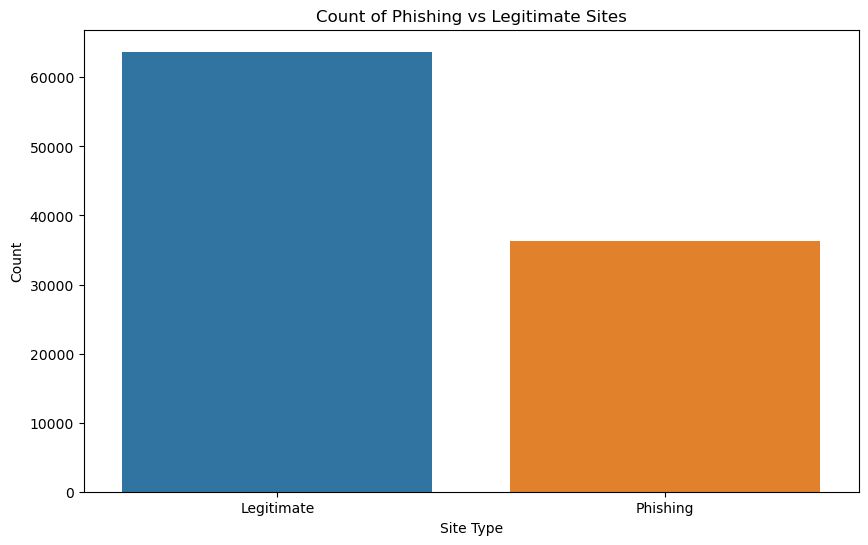

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='phishing', data=data)
plt.title('Count of Phishing vs Legitimate Sites')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.show()


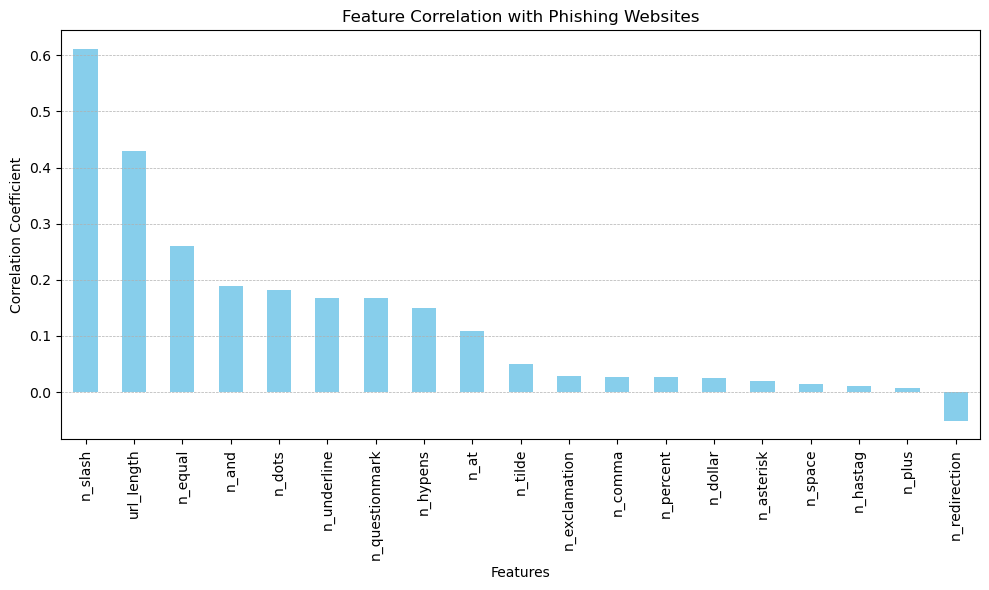

In [45]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Isolate the correlations of all features with the 'phishing' outcome and remove the 'phishing' correlation itself
phishing_correlation = correlation_matrix['phishing'].drop('phishing').sort_values(ascending=False)

# Create a bar plot for the correlation of each feature with 'phishing'
plt.figure(figsize=(10, 6))
phishing_correlation.plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Phishing Websites')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust the layout to fit the figure size
plt.show()

In [46]:
# Define features and the target variable
features = data.drop('phishing', axis=1)
target = data['phishing']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [47]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[11901   797]
 [ 2067  5251]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12698
           1       0.87      0.72      0.79      7318

    accuracy                           0.86     20016
   macro avg       0.86      0.83      0.84     20016
weighted avg       0.86      0.86      0.85     20016



In [48]:
# Trying a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     12698
           1       0.86      0.84      0.85      7318

    accuracy                           0.89     20016
   macro avg       0.89      0.88      0.88     20016
weighted avg       0.89      0.89      0.89     20016

